# CS51 Assignment 2: Algorithms and Simulation

This assignment has two distinct parts in addition to a reflection: Part 1 allows you to practice your algorithmic thinking skills and Part 2 allows you to gain a deeper understanding of numerical simulations. Material relevant for Part 1 will be covered during CS51 weeks 3-5 (especially session 5.2), while material relevant for Part 2 will be covered during weeks 6 and 7 (especially session 7.1). 

This is an individual assignment. We will be checking for similarities among submissions and will take plagiarism seriously.


## Part 1: Genetic Regression Algorithm  

This portion of the assignment checks your understanding of Python code and algorithmic thinking. Your notebook contains a set of very poorly documented python functions. These functions attempt to use a genetic algorithm to find the regression line for a dataset by looking for the two coefficients of the line. For each function, you’ll write comments explaining what the function does step-by-step, and the roles they play in the genetic algorithm. You will have to spend a considerable amount of time playing with the code! Check out the Python tips section for helpful strategies.

### 1. Function Description [#algorithms, optimization]

#### 1.1 For each of the functions **A to E**, add in-line comments to explain what the code is doing line-by-line. In addition to in-line comments, write a few sentences that address the following points. (50-100 words per annotation).

* Identify the aspect of a genetic algorithm that the function pertains to and explain why this aspect is important for optimization.  

* Describe how the function accomplishes its task.  

* Specify the inputs, outputs, and any major data structures involved.  


#### 1.2 Missing function: Function F currently does nothing. Use a process of elimination to determine, then describe, which common element of a genetic algorithm is missing from this program and could become F. Detail why this element of the algorithm is important for finding an optimal solution. Then, fill in function F with working code that accomplishes this task and explain how it works.

#### 1.3 Be sure to also consider the “main program” portion of the code. Add comments and explain what this part does and how it connects to the functions.

In [1]:
### Genetic algorithm to fit a regression line of the form y=ax+b to a 2-variable 
#dataset.

import random
import numpy as np

# load the data
my_data_file = 'temp_data.npy'
data = np.load(my_data_file)

# parameters 
initial_pop_size = 100
mutation_rate = 0.05
num_generations = 10 
chromosome_length = 2
num_survivors = 50

In [2]:
def A(): #defining the function which takes no input
    
    gene_pool = np.linspace(-1,80,num = 5000) #creates a sequence of 5000 evenly 
    #spaced numbers within the interval [-1 to 80]. So the first number in the 
    #array is -1, the last is 80, and the remaining 4998 values are evenly 
    #spread between -1 and 80. 
    
    dimensions = (initial_pop_size, chromosome_length) #sets the dimensions for 
    #the array.
    
    return np.random.choice(gene_pool, size=dimensions, replace=False) #generates 
    #and returns a random sample population without replacement from the array 
    #"gene_pool" with the size of the dimensions (100 rows with two columns). 

**Function A** is responsible for generating the initial population. First, it creates an array of 5000 numbers evenly spread between -1 and 80 (inclusive). Then it finds the initial population by drawing samples from the 5000 numbers using the np.random.choice function. According to the parameters and the dimensions, the shape of the array is (100, 2). Hence, there will be 100 chromosomes each with two genes, and each element is one of the 5000 numbers generated initially. Furthermore, the sampling is random which means that if the code is rerun, the initial population will change. 

In [3]:
def B(coefficients): #defines a function which takes coefficients as input. 
    k = len(data) #sets k equal to the length of the data/number of items in the data. 
    tot = 0 #sets the initial total equal to 0. 
    
    for j in range(k): #creates a for loop that iterates over the range of k (the 
    #length of the data). 
        
        y = coefficients[0] * data[j,0] + coefficients[1] #finds the y-value by 
        #multiplying the first set of elements of the coefficients array with the 
        #corresponding x-element from the real dataset array. Then, the second set 
        #of elements from the coefficients array is added. The result is then 
        #assigned to the variable y.
        
        res = data[j,1] - y #finds the residuals by taking the y value of the real 
        #data array and subtracting the corresponding y value found in the above 
        #line. Then, the results are contained within "res" as an array. 
        
        tot += res**2 #calculates the total sum of squared residuals by summing the 
        #squares of the individual residuals found in each iteration. 
    
    return tot/k #returns the sum of squared residuals divided by k/the length of 
    #the data to find the mean squared residuals. 

**Function B** takes the array "coefficients" as input and returns the mean squared residuals which allow us to find the fitness values/expected error which we can then try to minimize later by changing the parameters.

The algorithm uses the regression line equation to find the predicted y-value by taking the first chromosome of the coefficients data, multiplying it by the real dataset gene value (corresponding to the element in the current iteration's row [j] and in the first column). Afterward, it adds the value in the coefficient data's second row. Next, it calculates the residuals by taking the current y-value and subtracting the computed y-value. Then, it sums the squares of the residuals. 

This process is repeated in the range of k (the real data's length) to find the total sum of squared residuals. Lastly, it divides the total sum of squared residuals by the length of the data to compute the mean squared residuals.

In [4]:
def C(): #defines a function which takes no input.
    fitlist = [] #creates an empty list for the fitness values of each solution. 
    
    for x in range(len(current_pop)): #creates a for loop which iterates over the 
        #range of "current_pop" (the population generated by function A).
        
        fitlist.append(np.array([x,B(current_pop[x])])) #makes an array of the x 
        #values and the residuals values found by inputting the dataset "current_pop" 
        #into function B. The array is then appended to the fitness list. 
    
    return np.array(fitlist) #returns the fitness list as an array.

**Function C** is responsible for assembling a list of the fitness values. It starts by generating an empty list which will be used to store the fitness values. Through a for loop that iterates over the range of the "current_pop" dataset, the function takes the fitness values calculated by function B and appends them to the fitness list. Lastly, it returns the fitness list as an array with the first column being each x value (the range of the "current_pop" dataset's length) and the second column being the corresponding fitness value. 

In [5]:
def D(): #defines a function which takes no input
    
    random_selection = np.random.choice(range(len(fitness_vector)), \
    num_survivors//2, replace=False) 
    #the function selects random numbers within the range of the length of the 
    #fitness_vector generated with function C without replacement. The number 
    #of chosen elements is equal to the number of survivors divided by two and 
    #rounded down to the nearest integer. The elements are then assigned to the 
    #random_selection variable.   

    best = np.argmin(fitness_vector[random_selection,1]) #finds the index within 
    #the "random_selection" array that contains the element with the smallest 
    #fitness value (from the fitness_vectors) and assigns it to the variable "best". 
    
    best_index = random_selection[best] #takes the random_selection array and goes 
    #to the element at "best" index. Then this element is assigned to "best_index". 
    
    return current_pop[int(fitness_vector[best_index][0])] #in the "fitness_vector" 
    #array, it finds the element in the "best_index" row and first column [0]. 
    #Then it goes to the index in the "current_pop" array that has the element's 
    #value and returns the chromosome at this location.       

**Function D** takes no input and ultimately outputs the chromosome with the smallest fitness value from a random sample. This part of the algorithm optimizes the solution, as the process is repeated several times in the main program.  

First, it takes a random sample of numbers within the range of fitness_vector's length and assigns them to "random_selection". Then, it finds the index of the smallest fitness value in the "random_selection", goes back to the original list (fitness_vector) at this index, and assigns the value at this location to "best_index". Lastly, it returns the chromosome value that is at the "best_index" index. 

In [6]:
def E(): #defines a function which takes no input. 
    
    duplicate_size = len(new_population) - len(survivors) #takes the length of the 
    #"new_population", subtracts the length of the ”survivors", and assigns this 
    #value to "duplicate_size".
    
    duplicate_survivors = np.zeros((duplicate_size, chromosome_length)) #creates an 
    #array filled with zeroes with the dimensions of "duplicate size" (rows) versus 
    #chromosome_length (columns).
    
    for x in range(chromosome_length): #creates a for loop which iterates over the 
    #range of the chromosome_length.
        
        duplicate_survivors[:, x] = np.repeat(survivors[:, x], 4, axis=0) #repeats 
        #the survivor list from the beginning element to the current x (iteration) 
        #element four times. These elements are then assigned to "duplicate_survivors"
        #from the initial index to the index of the current iteration.  
        
        duplicate_survivors[:, x] = np.random.permutation(duplicate_survivors[:, x]) 
        #randomly permutates the "duplicated_survivors" array from the first element 
        #to the current x (iteration) element. The permuted array is then reassigned 
        #to "duplicated_survivors".
        
    return duplicate_survivors #returns the duplicated survivors. 

**Function E** finds the next generation by applying crossover and permutation among the surviving chromosomes. By using genes with the least fitness value (smallest error), it optimizes the offsprings and further generations.  

First, it finds the difference in length between the "new_population" and the "survivors" array. Then it prepares for the crossover by generating an array filled with zeroes which is later assigned values in the for loop. Here, different lengths of the "survivors" array are duplicated four times and then permutated. This process is then repeated in the range of the "chromosome_length," and lastly the final "duplicate_survivors" array is returned.    

In [7]:
from numpy.random import choice #importing package that allows to randomly generate 
#a number based on probability weights.

def F(array): # defines a function which takes an array as the input. 
    
    elements = [0, 1] #generates two elements where 0 corresponds to no mutation and 
    #1 to mutation. 
    weights = [1 - mutation_rate, mutation_rate] #sets the chance of not mutating and 
    #mutating (taken from the mutation_rate variable). 

    numrows = (len(array)) #finds the number of rows in the data array.
    numcolumns = (len(array[0])) #finds the number of columns in the data array.
    
    for i in range((len(array))): #iterates through each row. 
        
        for j in range((len(array[0]))): #iterates through each column. 

            mutate_number = choice(elements, p = weights) #generates a 0 or 1 which 
            #determines if the current element will be mutated. 
        
            if mutate_number == 1: #if the generated number is equal to 1, the 
            #element will mutate. 
            
                original_value = array[i, j] #assigning the current element's index 
                #to a variable. 

                random_index1 = np.random.randint(0, numrows) #generates a random 
                #row from the data array.
                random_index2 = np.random.randint(0, numcolumns) #generates a random 
                #column from the data array.

                random_value = array[random_index1, random_index2] #finds the value 
                #of the element at the random row and column and assigns this value 
                #to a variable. 

                array[i,j] = random_value #changes the current element's value to 
                #the value of the randomly selected element.

                array[random_index1, random_index2] = original_value #changes the 
                #randomly selected element's value to the value of the current 
                #element (to avoid that a value will be repeated several times).

    return array #returns the mutated array. 

**Missing part:**

The genetic algorithm is missing the mutation part which I have implemented through function F. Mutation is important in a genetic algorithm because it introduces and maintains diversity. Furthermore, it can help optimize the result by introducing different solutions that can help the algorithm arrive at a better solution. 

Function F results in swap mutation which happens when two genes are randomly selected and swapped. First, I had to implement the mutation rate which has been done by generating either a 0 or 1 for each gene where 0 corresponds to not mutating and 1 to mutating. Here, the chance of getting a 1 is equal to the mutation rate and the chance of getting a 0 is one minus the mutation rate. 

If a 1 is generated, the algorithm enters an if statement that performs the mutation. Within this statement, it stores the current element's original value in "original_value". Next, the algorithm chooses a random row and column (an index) from the data array by using the "np.random.randint" function. Then, it goes to the random index and stores the value in "random_value". Afterward, it changes the current element's value to the value of the randomly generated element, and the randomly generated element's value to the current element's value (they swap their values). The mutation process is then repeated for each element where a 1 is generated, and lastly it returns the mutated array

In [8]:
########################################################################
# Start of main program
current_pop = A() #sets the current population by calling on function A that 
#generates and returns a random sample population. 
new_population = np.zeros((num_survivors * 5, chromosome_length)) #returns an 
#array filled with zeroes with the length (number of rows) of five times the 
#number of survivors and number of columns equal to the chromosome length (2). 

# main loop
for i in range(num_generations): #sets up a for loop which iterates in the range of 
    #the number of generations (0,10).
    
    fitness_vector = C() #creates a fitness vector by calling function C. 
    survivors = np.zeros((num_survivors, chromosome_length)) #returns an array 
    #filled with zeroes with the length/number of rows equal to of the number of 
    #survivors and the number of columns equal to the chromosome length (2). 

    for n in range(len(survivors)): #sets up a for loop that iterates in the range 
        #of the length of the survivors array. 
        survivors[n] = D() #calls on function D to generate an array of the 
        #surviving chromones.
    new_population[:len(survivors)] = survivors #takes the new_population array 
    #filled with zeroes and places the survivor values in it. Where the first 
    #value is placed on the first index of the list and the last is placed on 
    #the index equal to the survivors list. 
    
    new_population[len(survivors):] = E() #calls on function E to take initiate 
    #the crossover process. The chromomes generated in this process is then 
    #added to the new_population list starting from the index next to the last 
    #filled. 
    
    new_population = F(new_population) #calls on function F to initiate the 
    #mutation process and reassign it back to "new_population".
    
    current_pop = new_population #creates the next generation by assigning making 
    #the current population the new population.
    new_population = np.zeros((num_survivors * 5, chromosome_length)) #returns an 
    #array filled with zeroes with the length (number of rows) of five times the 
    #number of survivors and number of columns equal to the chromosome length (2). 

fitness_vector = C() #creates a fitness vector by calling on function C.
best_solution = current_pop[np.argmin(fitness_vector[:,1])] #generates the best 
#solution (min. fitness value) within the current population.
print("The best solution is", best_solution) #prints the best solution. 
print("with error equal to approximately", B(best_solution)) #prints the approximate 
#error. 

The best solution is [ 0.70134027 67.13462693]
with error equal to approximately 30.401536474940066


**Main Program:**

The main program combines all the functions to form the genetic algorithm with the purpose of optimizing the regression line. First, it calls on Function A to generate the initial population of chromosomes (points). Then it produces an array filled with zeroes which will later contain the new population. Next, in the initial for loop, it calls on Function C to create an array which has the fitness values (residuals) found with the use of Function B. Afterward, it sets up another array filled with zeroes which is later used for the surviving chromosomes. 

Then the algorithm enters another for loop which calls on function D to generate the array of surviving chromosomes (the ones with the lowest fitness values/low residuals). These chromosomes are then placed in an array for the new population. Afterward, it performs crossover and mutation by calling on Function E and F respectively. Finally, the current population is changed to the newly generated population, and the "new_population" array is made ready for a new generation by filling it with zeroes again. 

The genetic algorithm repeats the process of finding the best fitness values among a random sample of the fitness values (Function B, C, and D), performing crossover (Function E), and performing mutation (Function F) in the range of the number of generations. As a result, the algorithm continues to optimize the regression line for each new generation it creates. 

Lastly, the algorithm prints the best solution with the lowest fitness value/lowest residuals. Here, the numbers indicate the two coefficients of the regression line. Additionally, it also prints the approximated error of the line. 

In [9]:
# scipy regression function to compare with the genetic algorithm's solutions
from scipy import stats 
print(stats.linregress(data)[0:2])

(0.5399259393210745, 70.70997220684585)


### 2. Overview [#optimization, #algorithms, #regression]

### 2.1 Write a paragraph to explain what the parameters at the top of the script are. By experimenting with varying parameter values, determine what values produce solutions that are closest to the actual solution most efficiently. Why do you think this is?  [~200 words]  

The task of the program is to reflect the process of natural selection in which the fittest chromosomes are used for reproducing the offsprings for the following generation. In this case, we are trying to optimize a regression line based on each point's fitness values. Here, we prefer a lower fitness value because it corresponds to smaller residuals. To optimize, the program goes through a process of determining the fitness values, performing crossover among the best points in a random sample, and mutating by swapping individual values. The algorithm performs this process several times until it reaches the desired number of generations. Lastly, the program outputs the two coefficients of the regression line corresponding to the slope and the y-intercept along with the approximated error of the regression line. Hence, the algorithm optimizes by going through a process several times where each iteration improves the solution a bit more. 

Furthermore, by using "scipy stats," we can compare the genetic algorithm's solution to the optimal solution which gives us insight into the performance of the genetic algorithm. 

### 2.2 Write a paragraph that gives an overview of how this program solves the given task and what the output represents.  [~200 words]:

The "initial_population" defines the number of chromosomes in the initial population. "Mutatiom_rate" sets the frequency of a single gene mutating. "Num_generations" determines how many generations the algorithm creates, corresponding to the number of times it replaces a current population by an optimized one. The "chromosome_length" is how many genes each chromosome has. Lastly, the "num_survivors" determines how many chromosomes survive with each new generation.  

The mutation rate should be small, to produce a solution close to the actual one (0.05 or lower). However, there should still be some mutation as it creates diversity and the possibility for better solutions that the algorithm might not find otherwise. Furthermore, I found that increasing the initial population made the error smaller. This might be the case because there are more gene values and thus additional lower fitness values that can be chosen. However, there will also be more high fitness values which can be selected. Therefore, I increased the number of generations because it makes the program go through the optimization process more times. As a result, for each generation, the coefficients of the regression line is improved and the error becomes smaller.

### 3. Optional challenges (basic):

For any attempted optional challenge, also indicate which HC(s) you are applying and why your solution constitutes a strong application.

### 3.1 Modify the program to include a visualization of how the error/fitness changes with each subsequent generation. Interpret this however you like, but make sure to include a detailed explanation.

In [10]:
#Note: I have added comments in the places where I have modified the code 
#and left out the comments added above in 1.3 to make the modifications 
#clearer.

from matplotlib.pylab import plt #package for plotting 

current_pop = A()
new_population = np.zeros((num_survivors * 5, chromosome_length))

count = 0 #setting a counter that can be used to generate each x-value for 
#the plotting. 
fitness_x = [] #generating an empty list for the x-values (each generation). 
fitness_y = [] #generating an empty list for the y-values (the error/fitness).

for i in range(num_generations):
    
    fitness_vector = C()
    survivors = np.zeros((num_survivors, chromosome_length))
    for n in range(len(survivors)):
        survivors[n] = D()
    new_population[:len(survivors)] = survivors
    new_population[len(survivors):] = E()
    
    new_population = F(new_population)
    
    current_pop = new_population
    new_population = np.zeros((num_survivors * 5, chromosome_length))
    
    
    current_best_index = np.argmin(fitness_vector[:,1]) #finding the index that 
    #contains the lowest error/fitness value within the current generation.
    current_best_fitness = fitness_vector[current_best_index,1] #finding the 
    #fitness value at the current_best_index.
    
    count += 1 #generating the current x-value. 
    fitness_x.append(count) #appending the x-value to the x-value list. 
    fitness_y.append(current_best_fitness) #appending the lowest error/fitness 
    #value for the current generation to the y-value list.

#plotting the x- and y-values with the use of matplotlip.
plt.plot(fitness_x, fitness_y,) #defining the axis. 
plt.ylabel("Error/Fitness") #y-label
plt.xlabel("Generation") #x-label
plt.title("Change in Error/Fitness Value for Each Generation") #title
plt.show() #showing the plot


fitness_vector = C()
best_solution = current_pop[np.argmin(fitness_vector[:,1])]
print("The best solution is", best_solution)
print("with error equal to approximately", B(best_solution))

<Figure size 640x480 with 1 Axes>

The best solution is [ 0.78235647 66.69713943]
with error equal to approximately 36.035978249493034


**Explanation:**

I have modified the code, to make it output a graph that shows the change in the error/fitness value for each further generation. To do so, I first created two empty lists one which will contain each generation number and each fitness value respectively. Additionally, I created a variable which counts each time a new generation is created, and these counts are then appended during the for loop. At the same time, after each generation is found, the error is appended to the list with fitness values. The algorithm does this by finding the index of the current best solution, going to this index, and then adding the value to the list. Lastly, I plot and format the diagram with the use of the matplotlib library. 

After running the code several times, I can see that the general trend for the diagram is that the error is high in the beginning, decreases quickly, and then evens out/stays constant for the rest of the generations. This pattern might happen because the genetic algorithm can quickly "kill" the worst chromosomes but then reaches a plateau where it is not able to decrease the error more. The latter might be improved by having more generations as this would further minimize the error.

**#algorithms:** I identified an appropriate way to code an algorithm which captures each generation number along with corresponding error and places them in a list. As a result, I generated a list of x-values and y-values that can be used for graphing.  Furthermore, I explained each step of the algorithm both through in-line comments and in the text above. 

**#dataviz:** I have generated a data visualization that is useful for getting a sense of how the error changes with each generation. Furthermore, I have properly formatted the figure and interpreted the trends seen in the in. 


#### 3.2 Optimize the code: There are many aspects of the code that could be improved. Choose one part of the code and describe in as much detail as possible a way in which it can be optimized. Then, implement your optimization. Be clear about what you are optimizing for and how your proposal accomplishes this. 

Edit this cell to answer part 3.2

### 4. Optional challenges (more advanced):
For any attempted optional challenge, also indicate which HC(s) you are applying and why your solution constitutes a strong application.

### 4.1 Modify the program to do multiple variable regression; that is, allow more predictor variables and find the regression equation that best fits the data. This needs to include first finding a dataset to test the program on and comparing the results of your algorithm to those that can be produced with a library regression function.

I tried to complete this challenge, but I think that there is something wrong or missing in my code since the error is quite high and the coefficients are not close to the ones found with the library function (see the end of the code). If possible, it would be great with some feedback or hints about where there might be some problems so that I can try to solve this challenge later. 

Although I do not think I fully solved the challenge, I still learned how to make .npy type files, how to use the linear regression function in the "sklearn" library, and the process of trying to implement multiple regression. Thus, I believe that I used **#selfawareness** because I assessed my strengths and decided to do the code to challenge myself. However, I also took my weaknesses and the time constraints into account by determining when I should stop and instead consult other sources for help. 

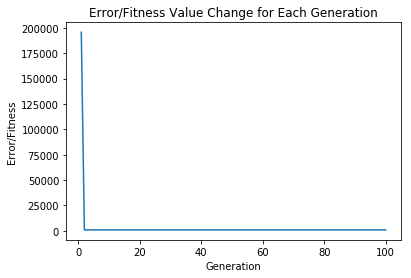

The best solution is [ 0.57171434 -0.62732547 43.0080016 ]
with error equal to approximately 920.0131978387623


In [11]:
### Genetic algorithm to fit a regression line of the form y= a + b1x1 + b2x2 to a 
#3-variable dataset

#packages - same as before
import random
import numpy as np
from numpy.random import choice
from matplotlib.pylab import plt #package for plotting 

my_second_file = 'created_multiple_regression_data.npy' #I created a new dataset 
#in the format of a npy file with three columns, 100 rows and numbers from -1 to 80 
#(including) called "created_multiple_regression_data.npy". 
data_mul_reg = np.load(my_second_file) #loading the dataset

# parameters - same as before
initial_pop_size = 100
mutation_rate = 0.05
num_generations = 100
chromosome_length = 3
num_survivors = 50

#same as before
def A():
    gene_pool = np.linspace(-1,80,num = 5000)
    dimensions = (initial_pop_size, chromosome_length)
    return np.random.choice(gene_pool, size=dimensions, replace=False)

#edited
def B(coefficients):
    k = len(data_mul_reg)
    tot = 0

    for j in range(k):
        y = (coefficients[0] * data_mul_reg[j,0]) + (coefficients[1] * \
        data_mul_reg[j,1]) + coefficients[2] #the function 
        #for calculating the y-values know incorporates the extra variable. 
        res = data_mul_reg[j,2] - y #moving the index to the right column 
        #with the y-values. 
        tot += res**2
    return tot/k

#same as before
def C():
    fitlist = []
    for x in range(len(current_pop)):
        fitlist.append(np.array([x,B(current_pop[x])])) 

    return np.array(fitlist)

#same as before
def D():
    random_selection = np.random.choice(range(len(fitness_vector)), \
    num_survivors//2, replace=False)
    best = np.argmin(fitness_vector[random_selection,1])
    best_index = random_selection[best]
    return current_pop[int(fitness_vector[best_index][0])]    

#same as before
def E():
    duplicate_size = len(new_population) - len(survivors)
    duplicate_survivors = np.zeros((duplicate_size, chromosome_length))
    for x in range(chromosome_length): 
        duplicate_survivors[:, x] = np.repeat(survivors[:, x], 4, axis=0) 
        duplicate_survivors[:, x] = np.random.permutation(duplicate_survivors[:, x])
    return duplicate_survivors

#same as before
def F(array):
    
    elements = [0, 1]
    weights = [1 - mutation_rate, mutation_rate]

    numrows = (len(array))
    numcolumns = (len(array[0]))
    
    for i in range((len(array))):
        
        for j in range((len(array[0]))):

            mutate_number = choice(elements, p = weights) 
        
            if mutate_number == 1:
            
                original_value = array[i, j]

                random_index1 = np.random.randint(0, numrows)
                random_index2 = np.random.randint(0, numcolumns)

                random_value = array[random_index1, random_index2]

                array[i,j] = random_value

                array[random_index1, random_index2] = original_value

    return array

########################################################################
# Start of main program - same as before
current_pop = A()
new_population = np.zeros((num_survivors * 5, chromosome_length))

count = 0
fitness_x = []
fitness_y = []

# main loop
for i in range(num_generations):
    
    fitness_vector = C()
    survivors = np.zeros((num_survivors, chromosome_length))
    for n in range(len(survivors)):
        survivors[n] = D()
    new_population[:len(survivors)] = survivors
    new_population[len(survivors):] = E()
    
    new_population = F(new_population)
    
    current_pop = new_population
    new_population = np.zeros((num_survivors * 5, chromosome_length))
    
    current_best_index = np.argmin(fitness_vector[:,1])
    current_best_fitness = fitness_vector[current_best_index,1]
    
    count += 1
    fitness_x.append(count)
    fitness_y.append(current_best_fitness)

plt.plot(fitness_x, fitness_y,)
plt.ylabel("Error/Fitness")
plt.xlabel("Generation")
plt.title("Error/Fitness Value Change for Each Generation")
plt.show()    

fitness_vector = C()
best_solution = current_pop[np.argmin(fitness_vector[:,1])]
print("The best solution is", best_solution)
print("with error equal to approximately", B(best_solution))

In [12]:
#importing packages to find the optimal regression line with a build-in function.
from sklearn import linear_model

reg = linear_model.LinearRegression() #using the linear_model.LinearRegression() 
#function to do multiple regression. 
reg.fit(data_mul_reg[:,:2], data_mul_reg[:,2:3]) #setting the x- and y-columns. 
the_coefficients = reg.coef_ #finding the regression coefficients.
print("b1 and b2 =", reg.coef_) #printing the value of b1 and b2.

first_term = the_coefficients[:,:1] #pulling the value of b1.
second_term = the_coefficients[:,1:] #pulling the value of b2.

#comouting the error term (a) as the build-in function does not include it.
mean_Y = np.mean(data_mul_reg[:,-1]) #finding the mean of the y-values. 

a = mean_Y - (first_term * data_mul_reg[0,0]) - (second_term * data_mul_reg[0,1]) 
#finding the a term through the formula a = Y_mean - (b1 * X1) - (b2 * X2).

print("a =", a) #printing the value of a.

b1 and b2 = [[ 0.00347563 -0.05835841]]
a = [[41.9436013]]


#### 4.2 Write your own genetic algorithm from scratch to find the regression line for a two-variable dataset, using different data structures and different functions than the code provided. This requires thorough explanation, sufficiently detailed so that another student could understand your algorithm.




Edit this cell to answer part 4.2

#### 4.3 Write your own algorithm to find the line of best fit for a two-variable dataset using a perceptron. As above, the explanations of your code need to be sufficiently detailed so that another student could understand it.

Edit this cell to answer part 4.3

## Part 2: Lotka-Volterra Simulation

In this portion of the assignment, you will produce code that uses Euler’s method to implement a simulation of the solutions of the Lotka-Volterra equations. In addition to providing more practice in Python programming, this project challenges you to understand numerical methods for solving differential equations, which will lead to a deeper understanding of these models.

### 1. Simulation Code [#algorithms, #simulation, #variables, #dataviz]

Write code that inputs the initial ($t=0$) populations for predator and prey, parameter values, desired final output time, and time-step size ($h$), and outputs graphs of both predator and prey populations at each time-step on the same plot; final predicted population sizes for both predator and prey. 

* Write comments for each function you define, specifying inputs and outputs, along with a brief description of what the function does.
* Consider your initial parameter inputs. Explain how the result changes as you vary the initial parameters. Can you find a set of initial parameters that produce stable cyclic population dynamics? Explain the significance of this.

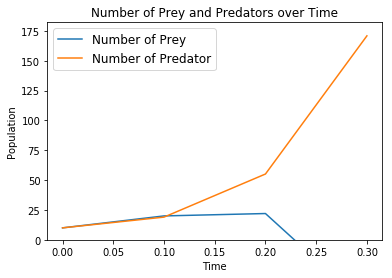

Final predicted prey population size = 0
Final predicted predators population size = 170.81
[10, 20.0, 22.0, -55.22000000000001]
[10, 19.0, 55.1, 170.81000000000003]


In [16]:
import numpy as np #importing necessary packages. 
from matplotlib.pylab import plt #package for plotting 

#defining a function which takes the inputs: initial prey population, initial 
#predator population, initial time final time, step size, and the parameters 
#alpha, beta, delta and gamma. It outputs the predicted prey and predator 
#population after the specified time along with a grapf of the populations. 
def euler(prey_start, predator_start, it, ft, step_size, a, b, d, g):
    
    timestamps = [] #generating a list for each timestamp
    timestamps.append(it) #appending the initial time to the timestamp list
    
    prey = [] #generating a list for the number of prey at each timestamp
    predator = [] #generating a list for the number of predator at each timestamp
    
    prey.append(prey_start) #appending the initial number of prey to the prey list
    predator.append(predator_start) #appending the initial number of predator to 
    #the predator list.
    
    #using a while loop to ensure that the function iterates as long as the final 
    #time has not been reached (most recent timestamp < final time). Also, if 
    #either the prey or predator populations become less than zero it will stop 
    #iterating (as a population cannot be negative).
    while timestamps[-1] <= ft and prey[-1] > 0 and predator[-1] > 0:
        
        #finding the new prey and predator number with the use of Euler's method. 
        #[-1] indicates that the last element of either the prey or predator 
        #list is used to find the new one. 
        prey_n = prey[-1] + (((a * prey[-1]) - (b * prey[-1] * predator[-1]))*step_size)
        predator_n = predator[-1] + (((d * prey[-1] * predator[-1]) + ((-g) * predator[-1]))*step_size)
        
        #appending the new prey and predator numbers to their respective lists. 
        prey.append(prey_n)
        predator.append(predator_n)
        
        #computing the new time to ensure that the while loop will not run 
        #infinitely.
        new_time = timestamps[-1] + step_size    
        #appending the new time to the timestamp list. 
        timestamps.append(new_time)
    
    #plotting the timestamp vs. the prey along with predator numbers and 
    #formatting the graph. 
    plt.plot(timestamps, prey, label = "Number of Prey")
    plt.plot(timestamps, predator, label = "Number of Predator")
    plt.ylabel("Population")
    plt.ylim(0)
    plt.xlabel("Time")
    plt.title("Number of Prey and Predators over Time")
    legend =plt.legend(loc="upper left", shadow=False, fontsize="large")
    plt.show()
    
    #if the last number in the prey list is negative it will output that the 
    #population is zero (as populations cannot be negative). Otherwise, 
    #it will output the predicted prey population.
    if prey[-1] < 0:
        print("Final predicted prey population size = 0")
    else:
        print ("Final predicted prey population size =", '%.2f' % prey[-1]) 
        #rounding the number to an integer as there cannot be e.g. half a prey. 
    
    #same as a above just for the predator population. 
    if predator[-1] < 0:
        print("Final predicted predator population size = 0")
    else:
        print("Final predicted predators population size =", '%.2f' % predator[-1]) 
        #rounding as above.
    
    print(prey)
    print(predator)

#calling the function
euler(10, 10, 0, 5, 0.1, 20, 1, 1, 1)



**Analysis of Results and Parameters:**

The results of the model can change drastically depending on the initial parameters. For many sets of the initial parameters, the preys take over, or both the preys and the predators die before the simulation reaches the desired final time. When the alpha = 1.1, beta = 0.4, delta = 0.1, and gamma = 0.4 and the initial prey and predator populations are e.g. equal to 10, it is possible to see a cyclical population pattern. 

This pattern is significant because it means that neither the prey or predator are going extinct over time. As a result, the outcome corresponds to what it hypothesized about prey and predator populations: as the predator population increases, the consumption of prey also increases. However, at one point there will not be enough prey for the predators which means that the population of the latter will decrease allowing for the prey population to grow again. Thus, the cyclical pattern continues. However, the simulation does have the limitation that it can calculate with values other than integers which means that the output prey and predator numbers might not be whole (although we cannot, e.g., have half a prey). 

### 2. Simulation Analysis [#simulation, #modeling]: 

Write a 500-word paper analyzing this simulation and comparing/contrasting it with the NetLogo Wolf Sheep Predation model from class. Address the following points in your write-up:

a) Are there any differences between the assumptions of the Lotka-Volterra model and the assumptions of your simulation? For example, consider whether the model and simulation are continuous or discrete.

b) How does your simulation contrast with an analytical approach to deriving the implications of the Lotka-Volterra model?

c) Compare and contrast your simulation with the NetLogo Wolf Sheep Predation simulation.

* Is each simulation stochastic or deterministic?
* Do they have differing assumptions?
* Do they give differing results?
* Which of them seems to be a more realistic representation of nature? Why?


**Analysis:**

The Lotka-Volterra model has many assumptions such as not taking environmental factors into account. As a result, it assumes that the prey population has no shortage of food, that it has no other threat than the single predator, and that it will grow exponentially when there are no predators. For the predator, it is assumed that they only eat this single prey. Also, for both of the agents, it is assumed that the parameters for birth, growth, death, eating are constant (Blaszak, n.d.). 
   
Similarly, the simulation also relies on these assumptions since it is built with the use of the Lotka-Volterra equations. However, there are still some differences. The model is continuous as it is possible to input any time. On the other hand, the simulation is discrete because it relies on a step size which means that the variables only take on countable values. 

Different implications can be derived from taking an analytical approach versus using the simulation. The analytic approach involves using only theoretical and mathematical methods which allows one to arrive at an actual answer and being able to generate a continuous graph of infinite numbers on the desired interval. Conversely, the simulation approximates the answer by estimating new points based on previous points. As a result, using the simulation will create a discrete graph where errors will be involved. However, one can lessen the error by using a smaller step size as this would generate more points.  

Another simulation that also models the prey versus predator populations is the NetLogo Wolf Sheep Predator simulation. The NetLogo model is stochastic because it uses a random generator to model different outputs which is evident by the use of “random” in the code of the simulation. On the other hand, the Lotka-Volterra simulation is deterministic because running the code several times will give the same output. The latter is also evident because the random module has not been used in the code.    

The two simulations rely on different assumptions since they have different parameters. Whereas the Lotka-Volterra simulations built on assumptions about the general populations, the NetLogo simulation relies on rules for the individual prey and predator. However, the latter still has the underlying assumptions of no environmental factors and that the prey and predator follow simple rules. Still, in the NetLogo simulation, it is possible to add another parameter that specifies that sheep must eat grass to survive which makes the simulation more realistic. Since the two simulations have different parameters, it also means that they can generate different results. In general, it can be hard to precisely compare their outputs because of not having the ability to compare their parameters directly. 

Overall, the NetLogo simulation seems more realistic because it accounts for behavior at the individual level and does not try to generalize system behavior. Still, both simulations rely on simple rules and assumptions which are highly unrealistic. Thus, the models might be used to get a sense of the pattern for a single prey and predator, but additional parameters would be needed to model a real-life situation more precisely. 

### 3. Optional [#simulation, #modeling]: 

In the following resource, read the back story on slide 3 and the explanation provided on slide 14. Then, modify your code above to examine the explanation given for why the number of predatory fishes increased after WWI. How do your simulated results compare to the analytical explanation? 

Sternberg, S. (2009). Lecture 15 Lotka-Volterra. Retrieved from http://www.math.harvard.edu/library/sternberg/slides/11809LV.pdf.


## Reflection 

Describe how you obtained the knowledge to complete the assignment, being sure to include attributions to specific individuals or groups who helped you and how they helped. You should elaborate on any strategies you used to assess your own understanding of the material. [#selfawareness] (<100 words)


**Relection:**

For the first task, I discussed the general understanding of the algorithm with Ananda, Ella, and Dima. Furthermore, I used a Numpy manual to understand some of the functions. For the mutation code, I assessed my understanding of the material by not finding a mutation code online but instead coding it from scratch (similar for the optional challenges). 

For part two, I started by writing the code in natural English to determine the necessary components. Then, I wrote the code while using print statements to check it. After trying to reach a cyclical pattern with different combinations of the initial inputs, I consulted Wikipedia. 

**References:**

Blaszak, T. (n.d.). Lotka-Volterra models of Predator-Prey Relationships. Retrieved March 2, 2019, from http://web.mst.edu/~huwen/teaching_Predator_Prey_Tyler_Blaszak.pdf

Lotka–Volterra equations. (2019, February 15). Retrieved March 3, 2019, from https://en.wikipedia.org/wiki/Lotka–Volterra_equations

NumPy v1.16 Manual. (n.d.). Retrieved March 3, 2019, from https://docs.scipy.org/doc/numpy/index.html